In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import ufit
import numpy as np
from ufit.lab import *
from lmfit.models import LinearModel, GaussianModel, LorentzianModel, PseudoVoigtModel, Model
set_datatemplate('C:/Users/num/Documents/cycle506/exp943/Datafiles/HB1_exp0943_scan%04d.dat')
ufit.set_dataformat('simple')

def gauss_fit(x,y,\
        center1,center1_vary,center1_min, center1_max,\
        fwhm1,fwhm1_vary, fwhm1_min, fwhm1_max,\
        amplitude1,amplitude1_vary, amplitude1_min, amplitude1_max,\
        results):
    erry =np.sqrt(y)


    pgvt1 = GaussianModel(prefix='g1_')
    pars = pgvt1.guess(y, x=x)
    pars['g1_center'].set(value=center1,
                           vary=center1_vary,
                           min=center1_min,
                           max=center1_max)
    pars['g1_sigma'].set(value=fwhm1 / 2.,
                          vary=fwhm1_vary,
                          min=fwhm1_min,
                          max=fwhm1_max)
    pars['g1_amplitude'].set(value=amplitude1,
                              vary=amplitude1_vary,
                              min=amplitude1_min,
                              max=amplitude1_max)

    mod1 =pgvt1
    init = mod1.eval(pars, x=x)
    out = mod1.fit(y, pars, x=x)
    print_fit_report = results
    if print_fit_report == 1:
        print((out.fit_report()))
    if print_fit_report == 0:
        #print('#--------peak1---------#')
        print(('g1_center:', out.params['g1_center'].value))
        print(('g1_fwhm:', out.params['g1_fwhm'].value))
        print(('g1_amplitude:', out.params['g1_amplitude'].value))
        print('chisqr, redchisqr', out.chisqr, out.redchi)
    if print_fit_report == -1:
        pass

    #--------------------------------------
    #plt.figure()
    plt.errorbar(x, y, erry, xerr=None, fmt='', marker='o', ms= 3, mfc='none', mec=None,\
                 ecolor=None, elinewidth=0.5, capsize=0,capthick=0,lw=0,\
                 label='cen:'+str('%10.3f'%out.params['g1_center'].value)+'\nfwhm :'+str('%10.3f'%out.params['g1_fwhm'].value))
    plt.plot(x, out.best_fit, '--r', linewidth=0.5)



def lgauss_fit(x,y,\
        slope,slope_vary,slope_min,slope_max,\
        intercept,intercept_vary, intercept_min, intercept_max,\
        center1,center1_vary,center1_min, center1_max,\
        fwhm1,fwhm1_vary, fwhm1_min, fwhm1_max,\
        amplitude1,amplitude1_vary, amplitude1_min, amplitude1_max,\
        results):
    erry =np.sqrt(y)

    lin_mod = LinearModel(prefix='l1_')
    pars = lin_mod.guess(y, x=x)
    pars['l1_slope'].set(value=slope,
                          vary=slope_vary,
                          min=slope_min,
                          max=slope_max)
    pars['l1_intercept'].set(value=intercept,
                              vary=intercept_vary,
                              min=intercept_min,
                              max=intercept_min)    

    pgvt1 = GaussianModel(prefix='g1_')
    pars.update(pgvt1.make_params())
    pars['g1_center'].set(value=center1,
                           vary=center1_vary,
                           min=center1_min,
                           max=center1_max)
    pars['g1_sigma'].set(value=fwhm1 / 2.,
                          vary=fwhm1_vary,
                          min=fwhm1_min,
                          max=fwhm1_max)
    pars['g1_amplitude'].set(value=amplitude1,
                              vary=amplitude1_vary,
                              min=amplitude1_min,
                              max=amplitude1_max)

    mod1 =lin_mod+pgvt1
    init = mod1.eval(pars, x=x)
    out = mod1.fit(y, pars, x=x)
    print_fit_report = results
    if print_fit_report == 1:
        print((out.fit_report()))
    if print_fit_report == 0:
        #print('#--------peak1---------#')
        print('g1_center:', out.params['g1_center'].value, '+-', out.params['g1_center'].stderr)
        print('g1_fwhm:', out.params['g1_fwhm'].value, '+-', out.params['g1_fwhm'].stderr)
        print('g1_amplitude:', out.params['g1_amplitude'].value, '+-', out.params['g1_amplitude'].stderr)
        print('chisqr, redchisqr', out.chisqr, out.redchi)
    if print_fit_report == -1:
        pass

    #--------------------------------------
    #plt.figure()
    plt.errorbar(x, y, erry, xerr=None, fmt='', marker='o', ms= 3, mfc='none', mec=None,\
                 ecolor=None, elinewidth=0.5, capsize=0,capthick=0,lw=0,\
                 label='cen:'+str('%10.3f'%out.params['g1_center'].value)+'\nfwhm :'+str('%10.3f'%out.params['g1_fwhm'].value))
    plt.plot(x, out.best_fit, '--r', linewidth=0.5)



def lgauss2_fit(x,y,\
        slope,slope_vary,slope_min,slope_max,\
        intercept,intercept_vary, intercept_min, intercept_max,\
        amplitude1,amplitude1_vary, amplitude1_min, amplitude1_max,\
        center1,center1_vary,center1_min, center1_max,\
        fwhm1,fwhm1_vary, fwhm1_min, fwhm1_max,\
        amplitude2,amplitude2_vary, amplitude2_min, amplitude2_max,\
        center2,center2_vary,center2_min, center2_max,\
        fwhm2,fwhm2_vary, fwhm2_min, fwhm2_max,\
        results):
    erry =np.sqrt(y)

    lin_mod = LinearModel(prefix='l1_')
    pars = lin_mod.guess(y, x=x)
    pars['l1_slope'].set(value=slope,
                          vary=slope_vary,
                          min=slope_min,
                          max=slope_max)
    pars['l1_intercept'].set(value=intercept,
                              vary=intercept_vary,
                              min=intercept_min,
                              max=intercept_min)    

    pgvt1 = GaussianModel(prefix='g1_')
    pars.update(pgvt1.make_params())
    pars['g1_center'].set(value=center1,
                           vary=center1_vary,
                           min=center1_min,
                           max=center1_max)
    pars['g1_sigma'].set(value=fwhm1 / 2.,
                          vary=fwhm1_vary,
                          min=fwhm1_min,
                          max=fwhm1_max)
    pars['g1_amplitude'].set(value=amplitude1,
                              vary=amplitude1_vary,
                              min=amplitude1_min,
                              max=amplitude1_max)

    pgvt2 = GaussianModel(prefix='g2_')
    pars.update(pgvt2.make_params())
    pars['g2_center'].set(value=center2,
                           vary=center2_vary,
                           min=center2_min,
                           max=center2_max)
    pars['g2_sigma'].set(value=fwhm2 / 2.,
                          vary=fwhm2_vary,
                          min=fwhm2_min,
                          max=fwhm2_max)
    pars['g2_amplitude'].set(value=amplitude2,
                              vary=amplitude2_vary,
                              min=amplitude2_min,
                              max=amplitude2_max)
    
    mod1 =lin_mod+pgvt1+pgvt2
    init = mod1.eval(pars, x=x)
    out = mod1.fit(y, pars, x=x)
    print_fit_report = results
    if print_fit_report == 1:
        print((out.fit_report()))
    if print_fit_report == 0:
        #print('#--------peak1---------#')
        print('g1_center:', out.params['g1_center'].value, '+-', out.params['g1_center'].stderr)
        print('g1_fwhm:', out.params['g1_fwhm'].value, '+-', out.params['g1_fwhm'].stderr)
        print('g1_amplitude:', out.params['g1_amplitude'].value, '+-', out.params['g1_amplitude'].stderr)
        print('chisqr, redchisqr', out.chisqr, out.redchi)
    if print_fit_report == -1:
        pass

    #--------------------------------------
    #plt.figure()
    plt.errorbar(x, y, erry, xerr=None, fmt='', marker='o', ms= 3, mfc='none', mec=None,\
                 ecolor=None, elinewidth=0.5, capsize=0,capthick=0,lw=0,\
                 label='cen:'+str('%10.3f'%out.params['g1_center'].value)+' fwhm :'+str('%10.3f'%out.params['g1_fwhm'].value)+'\n'+'cen:'+str('%10.3f'%out.params['g2_center'].value)+' fwhm :'+str('%10.3f'%out.params['g2_fwhm'].value))
    plt.plot(x, out.best_fit, '--r', linewidth=0.5)

def tcal(lamda, h,k,l):
    a,b,c=3.524041, 3.524041, 3.524041
    g=np.sqrt(((h*h)/(a*a))+((k*k)/(b*b))+((l*l)/(c*c)))
    d=1/g
    t=(180/np.pi)*np.arcsin(lamda/(2*d))
    return t
def e2l(e):
    return 9.045/np.sqrt(e)

def l2e(l):
    return (9.045*9.045)/(l*l)

def plot_params(x, y, font, lw, ms):
    plt.rcParams['figure.figsize'] = [x, y]
    plt.rcParams.update({'font.size': font})
    plt.rcParams['axes.linewidth'] = lw
    plt.rcParams["legend.markerscale"] = ms
    import matplotlib as mpl
    mpl.rcParams['patch.linewidth'] = 0.0


# HB-1 Instrument Calibration

- CYCLE 506, EXP 932, Proposal 9880 

- Avishek Maity (Trainee), Masaki Matsuda

- Date: 09-APR-2024


- Initial Spectrometer configuration:

      The monochromator is Heusler with a d-spacing of 3.437 Angstroms.

      Collimation: 48'-80'-60'-999'

      The spectrometer is configured to have a fixed final energy of 13.5000 meV

      Scattering sense = +-+



## Step 1

#Alignment of m1 with monitor

- Drive the final energy to 13.5 meV
      #drive ef 13.5

- Drive energy transfer to zero
      #drive e 0

- Remove the shielding from the top of the analyzer drum

- Remove the Heusler Analyzer
  
- Drive analyzer two theta (a2) to ZERO
      #drive a2 0
  
- Set slit for a narrow oppening
      #drive slit_pre_tp 25 slit_pre_bt 25 slit_pre_rt 3 slit_pre_lf 3
  
- Monitor was placed after the slit and befor the sample
      #note: The guide between sample and slit needs to be moved out for this purpose.

- Change Counter to the monitor with counting time 5 sec
      #defcount monitor
      #preset time 5

- Scan m1 between +-0.6 degree relative to the current position
      #scanrel m1 -0.6 0.6 0.1

C:\Users\num\AppData\Local\anaconda3\Lib\site-packages\ufit\data\loader.py:108: RuntimeWarning: invalid value encountered in sqrt
  datarr[:, 2] = sqrt(datarr[:, 1])


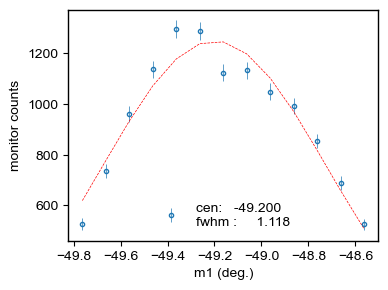

In [314]:
d=read_data(1)
x=d['col_m1']
y=d['col_monitor']
plot_params(4,3,10,1,1)
plt.figure()
gauss_fit(x,y,\
            -49.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             -1)
plt.ylabel('monitor counts')
plt.xlabel('m1 (deg.)')
plt.legend()
plt.savefig('m1-alignment.jpg')
plt.show()

- Move m1 to the peak center of the gaussian fit, in this case -49.2
      #drive m1 -49.2
  
- Put back the monitor before sample, as was placed before.
  
- Put back the guide to the optical rail inbetween slit and sample, as was placed before.
  
- Use needle magnet to check guide field direction (up) if necessary

## Step 2

#Alignment of m2 and s2

- Set slits to a broader opening, #drive slit_pre_tp 25 slit_pre_bt 25 slit_pre_rt 15 slit_pre_lf 15
   
- Reset your counter from  'monitor' to 'detector', #defcount detector

- Move sample 2theta (s2=30), this will allow some space for the next steps. 

- Remove the PG-filter (for using $\lambda/2$ for Ni-powder calibration ) following the steps:
  
      - Move out the guide field after the sample.
  
      - Remove the shielding around the filter (take care of the guide inside).

      - Make a note that the filter was already out by 5-7 mm not to hit the Solid State collimator in the analyzer shielding.
  
      - Then move out the PG filter (use the dedicated tool to pull it out).
  
      - Place the 'Ni-powder' sample for the calibration measurements.



- Ni-powder calibration can be started from the GUI (or from command line)

      - powcalib ni 1.000000 energy 13.500000 maxpeaks 6 (at 13.5 meV, count for 1 sec)

      - Using (0.5,0.5,0.5), (1,0,0), (1,1,0), (1.5,0.5,0.5), (1,1,1), (2,0,0)

      - After the scans are done accept the new zero angle for m2 and s2 from the GUI.
          #zero m2 xx
          #zero s2 xx

      - Drive the spectrometer to the elastic configuration e=0
          #drive e 0

      - Drive the sample two theta to -30 for comfortable access to PG-filter shileding area.
          #drive s2 -30

C:\Users\num\AppData\Local\anaconda3\Lib\site-packages\ufit\data\loader.py:108: RuntimeWarning: invalid value encountered in sqrt
  datarr[:, 2] = sqrt(datarr[:, 1])


g1_center: -35.15217205564274 +- 0.004924963439253939
g1_fwhm: 1.163369748418447 +- 0.015554589478892478
g1_amplitude: 9885.921096965823 +- 157.68456498779528
chisqr, redchisqr 1137072.4117574596 30731.686804255667
g1_center: -40.83165755849498 +- 0.0058390927369921875
g1_fwhm: 1.1632071141795224 +- 0.01613209092917668
g1_amplitude: 5542.866750040352 +- 88.99325741825706
chisqr, redchisqr 380218.73552323325 10561.631542312034
g1_center: -59.168083083143614 +- 0.004856142666209839
g1_fwhm: 1.261910913958208 +- 0.012886971168631208
g1_amplitude: 5638.921366916988 +- 62.400176785495475
chisqr, redchisqr 175613.2647010808 4878.146241696689
g1_center: -88.56850552351406 +- 0.006218641634431643
g1_fwhm: 2.0954885285772082 +- 0.01654687534149
g1_amplitude: 9540.47669160506 +- 82.21023149360275
chisqr, redchisqr 109949.73283497548 3054.1592454159854
g1_center: -70.74860921381517 +- 0.005577045159714189
g1_fwhm: 1.4276666445876862 +- 0.016115734871368623
g1_amplitude: 8324.582260687606 +- 113.0

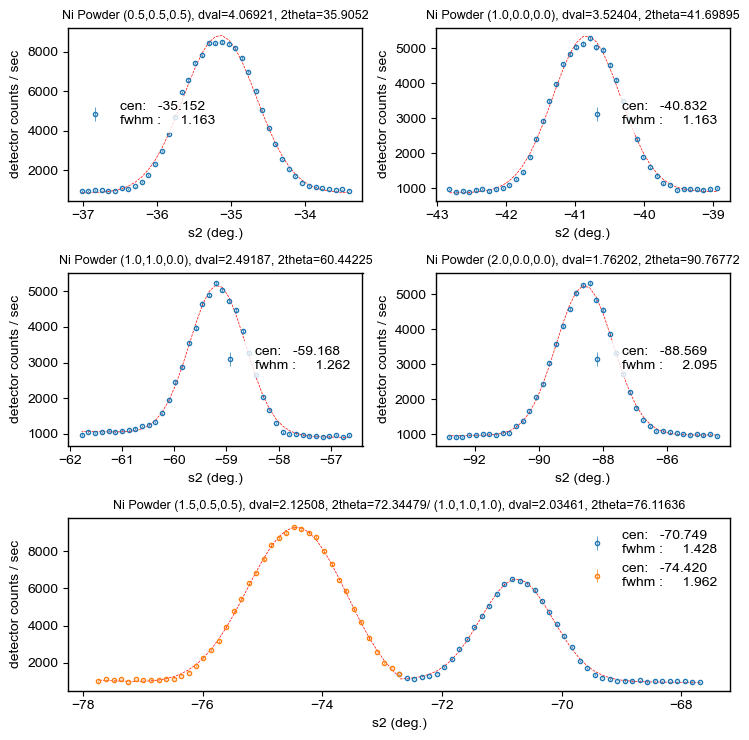

In [312]:
plot_params(7.5,7.5,10,1,1)

plt.figure()
plt.subplot(3,2,1)
plt.title('Ni Powder (0.5,0.5,0.5), dval=4.06921, 2theta=35.9052', fontsize=9)
d=read_data(4)
x=d['col_s2']
y=d['col_detector']
lgauss_fit(x,y,\
          0, False, None, None,\
          1, True, None, None,\
            -36.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             0)
plt.ylabel('detector counts / sec')
plt.xlabel('s2 (deg.)')
plt.legend()

plt.subplot(3,2,2)
plt.title('Ni Powder (1.0,0.0,0.0), dval=3.52404, 2theta=41.69895', fontsize=9)
d=read_data(5)
x=d['col_s2']
y=d['col_detector']
lgauss_fit(x,y,\
          0, True, None, None,\
          1, True, None, None,\
            -41.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             0)
plt.ylabel('detector counts / sec')
plt.xlabel('s2 (deg.)')
plt.legend()

plt.subplot(3,2,3)
plt.title('Ni Powder (1.0,1.0,0.0), dval=2.49187, 2theta=60.44225', fontsize=9)
d=read_data(6)
x=d['col_s2']
y=d['col_detector']
lgauss_fit(x,y,\
          0, True, None, None,\
          1, True, None, None,\
            -59.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             0)
plt.ylabel('detector counts / sec')
plt.xlabel('s2 (deg.)')
plt.legend()

plt.subplot(3,2,4)
plt.title('Ni Powder (2.0,0.0,0.0), dval=1.76202, 2theta=90.76772', fontsize=9)
d=read_data(8)
x=d['col_s2']
y=d['col_detector']
lgauss_fit(x,y,\
          0, True, None, None,\
          1, True, None, None,\
            -88.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             0)
plt.ylabel('detector counts / sec')
plt.xlabel('s2 (deg.)')
plt.legend()


plt.subplot(3,1,3)
plt.title('Ni Powder (1.5,0.5,0.5), dval=2.12508, 2theta=72.34479/ (1.0,1.0,1.0), dval=2.03461, 2theta=76.11636', fontsize=9)
d=read_data(7)
x=d['col_s2'][:-40]
y=d['col_detector'][:-40]
lgauss_fit(x,y,\
           0, True, None, None,\
           1, True, None, None,\
           -71.2, True, None, None,\
           1,  True, None, None,\
           1000, True, None, None,\
           0)

x=d['col_s2'][40:]
y=d['col_detector'][40:]
lgauss_fit(x,y,\
           0, True, None, None,\
           1, True, None, None,\
           -74.2, True, None, None,\
           1,  True, None, None,\
           1000, True, None, None,\
           0)


plt.ylabel('detector counts / sec')
plt.xlabel('s2 (deg.)')
plt.legend()

plt.tight_layout()
plt.savefig('Ni-calibration.jpg')
plt.show()

- Performing calibration using Ni(d-spacing=3.524041) with the following data
- h    k    l      d-spacing     position
  
- 0.50 0.50 0.50        4.06921     -35.149420+/-0.005235
- 1.00 0.00 0.00        3.52404     -40.829179+/-0.005926
- 1.00 1.00 0.00        2.49187     -59.182585+/-0.007981
- 1.50 0.50 0.50        2.12508     -70.754354+/-0.008555
- 1.00 1.00 1.00        2.03461     -74.464934+/-0.007335
- 2.00 0.00 0.00        1.76202     -88.573833+/-0.007014


#h, k, l, dval, 2theta_cal, 2theta_exp, err

calib=np.array([

[0.50, 0.50, 0.50, 4.06921, -35.21188556, -35.1521720556427, 0.004924963439253939],

[1.00, 0.00, 0.00, 3.52404, -40.88422223, -40.8316575584949, 0.005839092736992187],

[1.00, 1.00, 0.00, 2.49187, -59.19835818, -59.1680830831436, 0.004856142666209839],

[1.50, 0.50, 0.50, 2.12508, -70.78627965, -70.7486092138151, 0.005577045159714189], 

[1.00, 1.00, 1.00, 2.03461, -74.44869058, -74.4196305968323, 0.006102618974781595],

[2.00, 0.00, 0.00, 1.76202, -88.61703456, -88.5685055235140, 0.006218641634431643]], dtype=float)

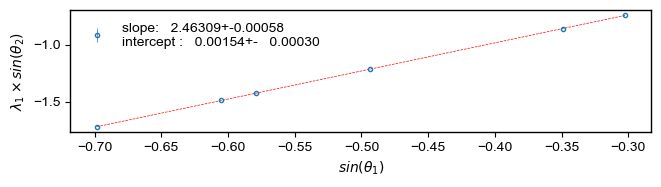

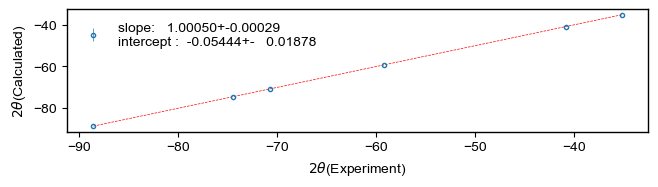

In [315]:
calib=np.array([
[0.50, 0.50, 0.50, 4.06921, -35.21188556, -35.1521720556427, 0.004924963439253939],
[1.00, 0.00, 0.00, 3.52404, -40.88422223, -40.8316575584949, 0.005839092736992187],
[1.00, 1.00, 0.00, 2.49187, -59.19835818, -59.1680830831436, 0.004856142666209839],
[1.50, 0.50, 0.50, 2.12508, -70.78627965, -70.7486092138151, 0.005577045159714189], 
[1.00, 1.00, 1.00, 2.03461, -74.44869058, -74.4196305968323, 0.006102618974781595],
[2.00, 0.00, 0.00, 1.76202, -88.61703456, -88.5685055235140, 0.006218641634431643]], dtype=float)
lamda1=2.461619 #(for 13.5 meV)
plot_params(7.5,3.5,10,1,1)
x,y,yerr=np.sin((np.pi/180)*calib[:,4]/2), lamda1*np.sin((np.pi/180)*calib[:,5]/2), lamda1*np.sin((np.pi/180)*calib[:,6]/2)
plt.figure()
plt.subplot(2,1,1)
#plt.errorbar(x,y, yerr)
lin_fit(x, y, slope=1, slope_vary=True, slope_min=None, slope_max=None, intercept=0, intercept_vary=True, intercept_min=None, intercept_max=None, results=-1)
plt.legend()
plt.xlabel(r'$sin(\theta_1)$')
plt.ylabel(r'$\lambda_1 \times sin(\theta_2)$')

plt.show()

x,y,yerr=calib[:,5], -2*tcal(2.46309225863336, calib[:,0],calib[:,1],calib[:,2]), 2*tcal(0.0005766054673102825, calib[:,0],calib[:,1],calib[:,2])
plt.subplot(2,1,2)
#plt.errorbar(x,y, yerr)
lin_fit(x, y, slope=1, slope_vary=True, slope_min=None, slope_max=None, intercept=0, intercept_vary=True, intercept_min=None, intercept_max=None, results=-1)
plt.legend()
plt.xlabel(r'$2\theta$(Experiment)')
plt.ylabel(r'$2\theta$(Calculated)')
plt.savefig('lamda2.jpg')
plt.show()

## Step 3

#Alignment of a1 and a2

- Put back the PG-filter
  
      - DO NOT insert the filter completely inside the analyzer shielding
      - leave 5-7 mm out side the shielding to avoid the collision with the solid sate collimator
  
  
- Remove the shielding around the filter (take care of the guide inside the shielding).

- Put back the guide field after the sample.

- Put the Remove Heusler analyzer back in the anlyzer drum

- Put back the shielding on the top of the analyzer drum

- For analyzer calibration put the 'plastic standard' sample

- Check with speedometer for some intensity by driving relative +- 1.5 degrees is necessary
  
- make a a1 scan around the relative postion and find the peak
  
- Change the counting time 5 sec #preset time 5

- Scan m1 between +-2.5 degree relative to the current position #scanrel a1 -2.5 2.5 0.25

- Move a1 to the peak center of the gaussian fit, in this case 20.579 #drive a1 20.579


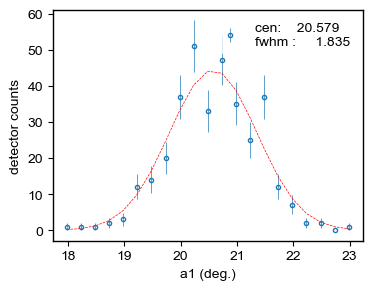

In [316]:
d=read_data(9)
x=d['col_a1']
y=d['col_detector']
plot_params(4,3,10,1,1)
plt.figure()
gauss_fit(x,y,\
            20.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             -1)
plt.ylabel('detector counts')
plt.xlabel('a1 (deg.)')
plt.legend()
plt.savefig('a1_alignment.jpg')
plt.show()

- Make a theta2theta scans to correct for the a2 and a1 anlges

- Fit the two scans and move the a1 nad a2 to the peak postion.

- Set in the GUI the "Current anlyzer settings corresponds to Ef=13.5 meV" 

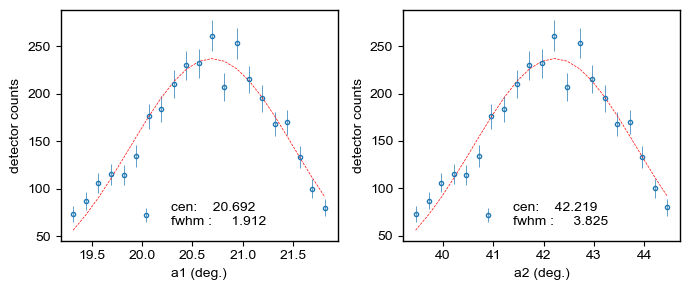

In [317]:
d=read_data(10)
x=d['col_a1']
y=d['col_detector']
plot_params(7,3,10,1,1)
plt.figure()
plt.subplot(1,2,1)
gauss_fit(x,y,\
            20.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             -1)
plt.ylabel('detector counts')
plt.xlabel('a1 (deg.)')
plt.legend()

plt.subplot(1,2,2)
x=d['col_a2']
y=d['col_detector']

gauss_fit(x,y,\
            42.2, True, None, None,\
             0.5,  True, None, None,\
             1000, True, None, None,\
             -1)
plt.ylabel('detector counts')
plt.xlabel('a2 (deg.)')
plt.legend()
plt.tight_layout()
plt.savefig('a1_a2_alignment.jpg')
plt.show()

## Step 4

#Flipper calibration: correction of the flipper guide fileds 'hguide' and 'vguide'

- Connect all the flipper coil and the guide field colils to the power supply

- Initialize the flipper and fields with 'init' command
  
- Put the Si crystal for flipper calibration

- set just the a lattice parameters a=3.135 and leave the others as the default (5)

-  Scattering plane remained as [100] [001]

-  calculate the s2 and s1 from the UB calculateor, in this case s2=-46.23300, s1=-23.00000

-  Drive sample angles to the respective peak positions #drive s2 -46.233 s1 -23

-  Turn on the flipper fixed vertical guide field and the helmohltz vertical guide field at the sample position

      - drive fguide 4.5
        
      - guide 18 perpq
        
-  check for the peak by relatively driving the s1 and following the speedometer and go to the maximum

-  then check the optimum sgu by driving the sgu in the limit of +-3

-  drive hguide to 1.8 and make a scan of the flipper fixed compensastion field vguide between 1 and 4 with count time 1 sec

      - drive hguide 1.8 (i.e. )

      - preset time 1

      - scan vguide 1 4 0.1
 
- drive the vguide to the peak position, in this case vguide 2.34 gauss

- With the field on fguide 4.5109   hguide 1.7993   vguide 2.343  tbguide 5.1158   count for 10 secs

      - count preset time 10 (gives FLIPPER ON counts 27905.000)

- then switch off the flipper #floff drive hguide off vguide off"

      - count preset time 10 (gives FLIPPER OFF counts 280553.000)

- Flipping ratio FR = (counts FLIPPER OFF/ counts FLIPPER ON) = 10

- Beam polarization P = (FR-1)/(FR+1) = 9/11= 82%

- One may finally do a scan for the fguide which is generally stays at 4.5 gauss

      - flon: drive hguide on vguide on
      - scan fguide 2 6 0.25
      - drive fguide to the maximum, in this case 4.43 gauss.



('g1_center:', 2.342522938055374)
('g1_fwhm:', 1.732357570036023)
('g1_amplitude:', -21294.280969892512)
chisqr, redchisqr 171378022.474991 6855120.89899964


C:\Users\num\AppData\Local\Temp\ipykernel_13976\3648376987.py:16: RuntimeWarning: invalid value encountered in sqrt
  erry =np.sqrt(y)


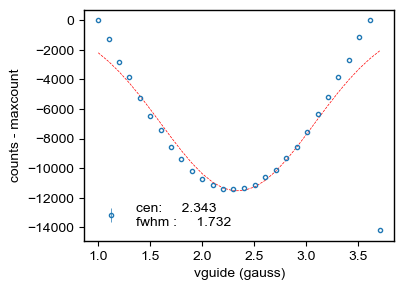

('g1_center:', 4.432143880628567)
('g1_fwhm:', 2.7253472301742176)
('g1_amplitude:', -21961.30523171658)
chisqr, redchisqr 1881196.4194543501 171017.85631403184


C:\Users\num\AppData\Local\Temp\ipykernel_13976\3648376987.py:16: RuntimeWarning: invalid value encountered in sqrt
  erry =np.sqrt(y)


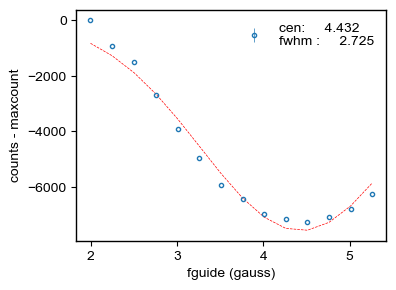

In [347]:
d=read_data(11)
x=d['col_vguide']
y=d['col_detector']
plot_params(4,3,10,1,1)
plt.figure()
gauss_fit(x,y-y.max(),\
            2.25, True, None, None,\
             1.5,  True, None, None,\
             -5000, True, None, None,\
             0)
plt.ylabel('counts - maxcount')
plt.xlabel('vguide (gauss)')
plt.legend()
plt.savefig('vguide_alignment.jpg')
plt.show()


d=read_data(12)
x=d['col_fguide'][:-1]
y=d['col_detector'][:-1]
plot_params(4,3,10,1,1)
plt.figure()
gauss_fit(x,y-y.max(),\
            4.5, True, None, None,\
             .1,  True, None, None,\
             1, True, None, None,\
             0)
plt.ylabel('counts - maxcount')
plt.xlabel('fguide (gauss)')
plt.legend()
plt.savefig('fguide_alignment.jpg')
plt.show()

In [2]:
from tkinter import messagebox, ttk
import tkinter as tk

def display_selection():
    # Get the selected value.
    selection = combo.get()
    messagebox.showinfo(
        message=f"The selected value is: {selection}",
        title="Selection"
    )

main_window = tk.Tk()
main_window.config(width=300, height=200)
main_window.title("Combobox")
combo = ttk.Combobox(
    state="readonly",
    values=["Python", "C", "C++", "Java"]
)
combo.place(x=50, y=50)
button = ttk.Button(text="Display selection", command=display_selection)
button.place(x=50, y=100)
main_window.mainloop()